## Chapter 6 - Problem 8
***

**8.** In this exercise, we will generate simulated data, and will then use
this data to perform best subset selection.

**A.** Use the rnorm() function to generate a predictor X of length
n = 100, as well as a noise vector $\epsilon$ of length n = 100.

In [743]:
set.seed(100)
x = rnorm(100)
ep = rnorm(100)

**B.** Generate a response vector Y of length n = 100 according to
the model: <br>  $$Y = β_0 + β_1X + β_2X^2 + β_3X^3 + \epsilon$$, <br>
where $β_0$, $β_1$, $β_2$, and $β_3$ are constants of your choice.

In [744]:
B0 = 3
B1 = -2
B2 = -0.5
B3 = 0.5

y = B0 + x*B1+x^2*B2+x^3*B3+ep

**C.** Use the regsubsets() function to perform best subset selection
in order to choose the best model containing the predictors
X,$X_2$, ...,$X_{10}$. What is the best model obtained according to
Cp, BIC, and adjusted $R^2$? Show some plots to provide evidence
for your answer, and report the coefficients of the best model obtained.
Note you will need to use the data.frame() function to
create a single data set containing both X and Y .

In [745]:
X <- poly(x,10,raw = TRUE)
dataset <- data.frame(y,X)
library(leaps)
regfit.full <- regsubsets(y~., data = dataset,nvmax = 10)
regfit.summary <- summary(regfit.full)

(Intercept)          X1          X2          X3 
  2.9395742  -2.1932526  -0.4344959   0.5249081

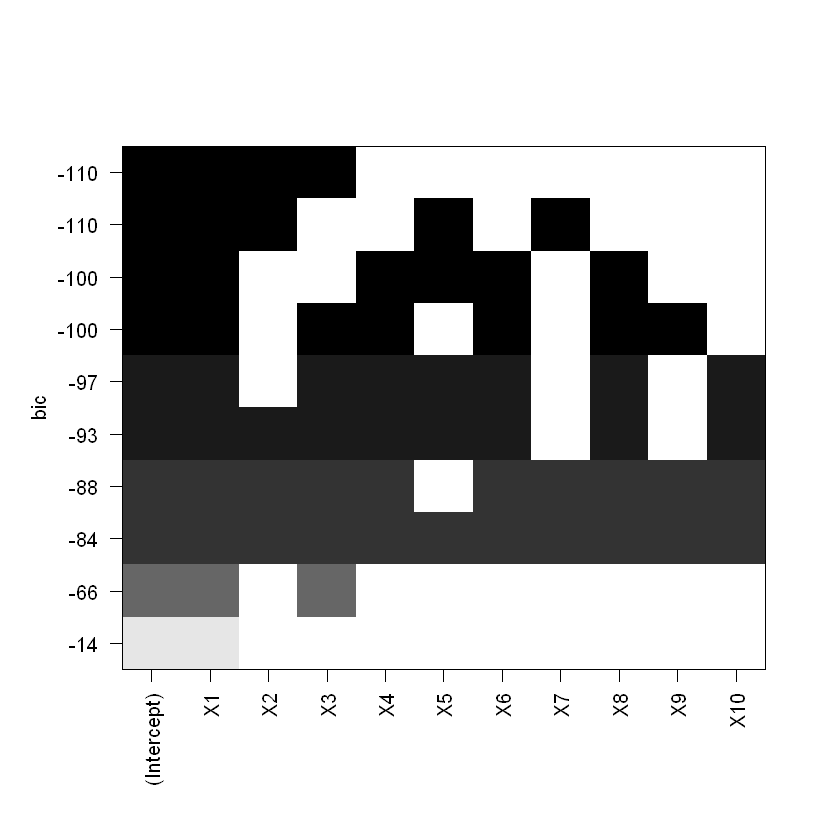

In [746]:
plot(regfit.full, scale = "bic")
coef(regfit.full,which.min(regfit.summary$bic))

(Intercept)          X1          X2          X5          X7 
 2.95981156 -1.76126157 -0.45415845  0.14242182 -0.01048855

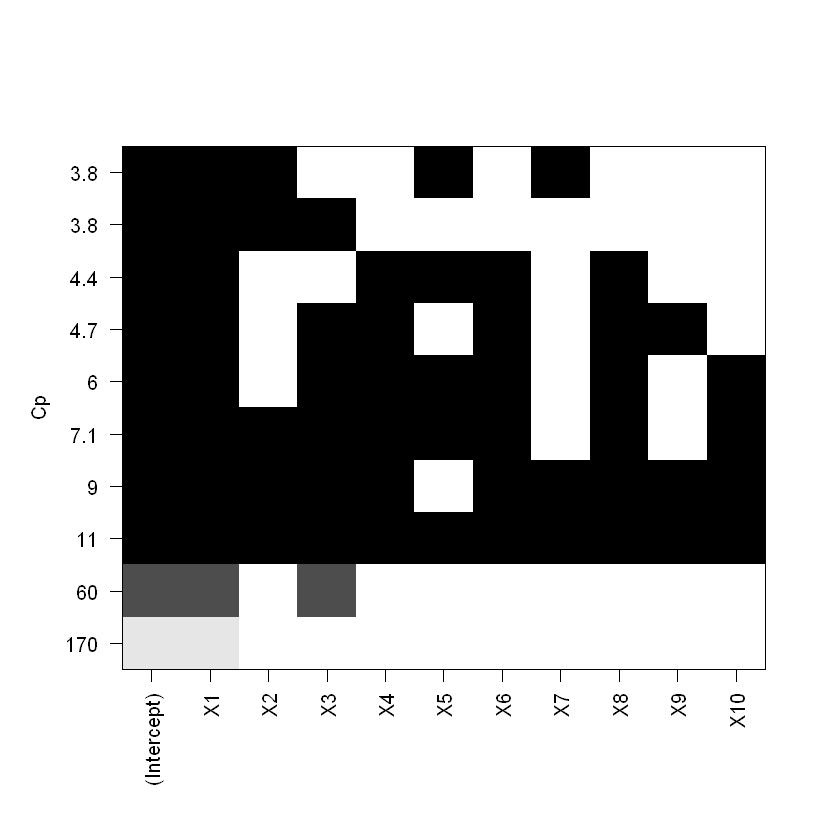

In [747]:
plot(regfit.full, scale = "Cp")
coef(regfit.full,which.min(regfit.summary$cp))

(Intercept)            X1            X3            X4            X6 
 2.9480947578 -1.9858071676  0.3958372434 -0.6536613446  0.2242729641 
           X8            X9 
-0.0217311144  0.0008446376

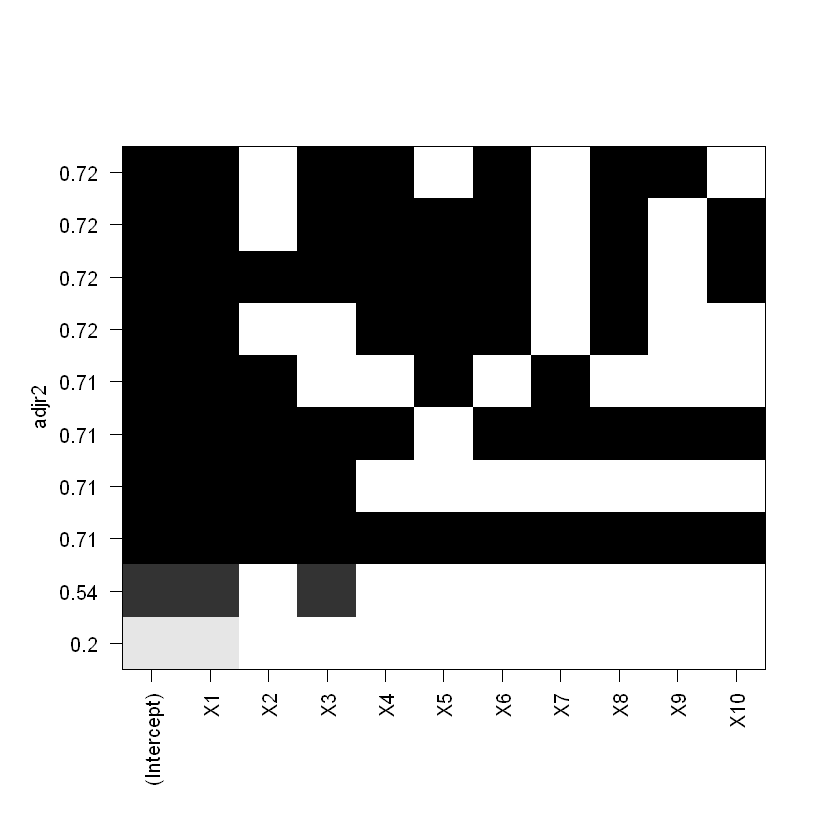

In [748]:
plot(regfit.full, scale = "adjr2")
coef(regfit.full,which.max(regfit.summary$adjr2))

Based on Mallow's Cp, BIC and adjusted $R^2$ criterion, the best model includes $x_1$ and $x_4$ <br>
Both intercept and $x_1$ coefficient are close to the selected values, however both $x_2$ and $x_3$
have been excluded in favor of $x_4$  

**D.** Repeat (c), using forward stepwise selection and also using backwards
stepwise selection. How does your answer compare to the
results in (c)?

## Forward Selection 
***

In [749]:
forward.fit <- regsubsets(y~., data = dataset,nvmax = 10, method = "forward")
forward.summary <- summary(forward.fit)

(Intercept)          X1          X2          X3 
  2.9395742  -2.1932526  -0.4344959   0.5249081

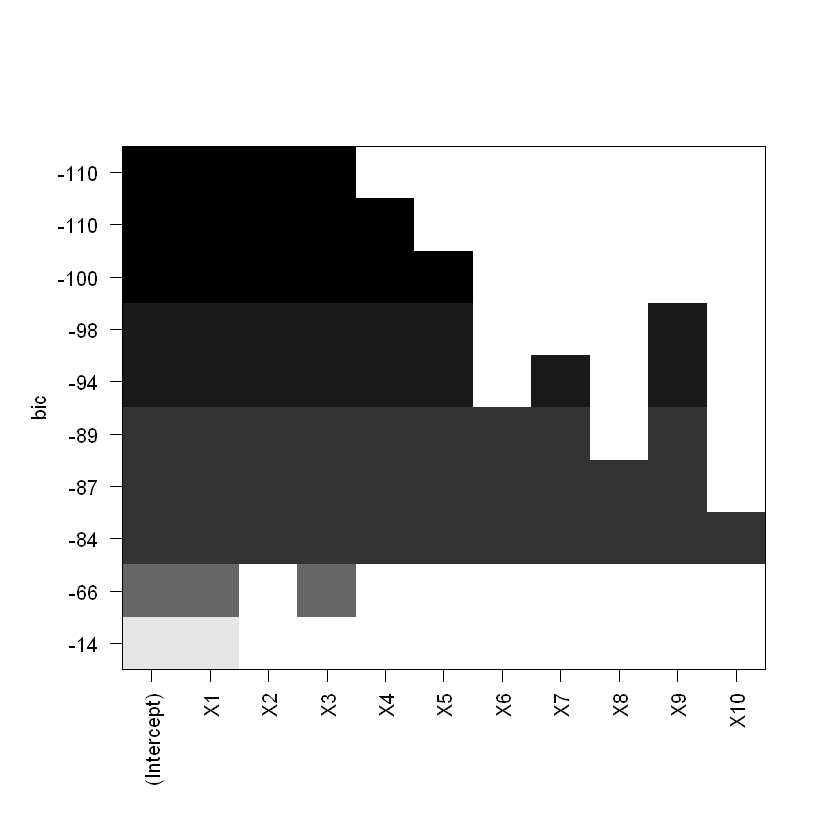

In [750]:
plot(forward.fit, scale = "bic")
coef(forward.fit,which.min(forward.summary$bic))

(Intercept)          X1          X2          X3 
  2.9395742  -2.1932526  -0.4344959   0.5249081

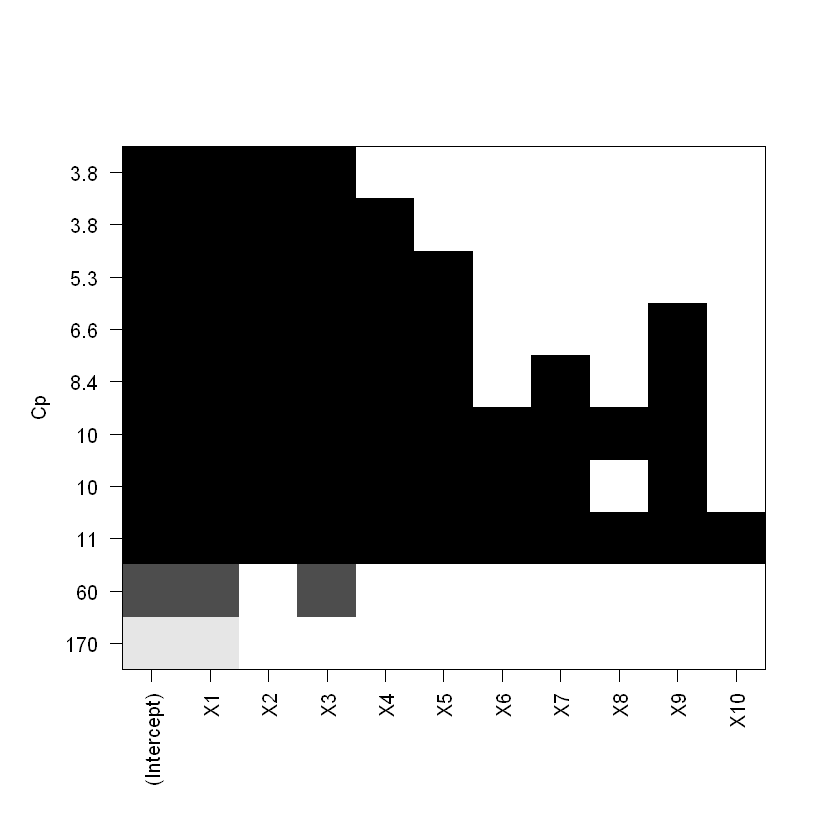

In [751]:
plot(forward.fit, scale = "Cp")
coef(forward.fit,which.min(forward.summary$cp))

(Intercept)          X1          X2          X3          X4 
 3.02018841 -2.13343968 -0.65472198  0.49668498  0.04786891

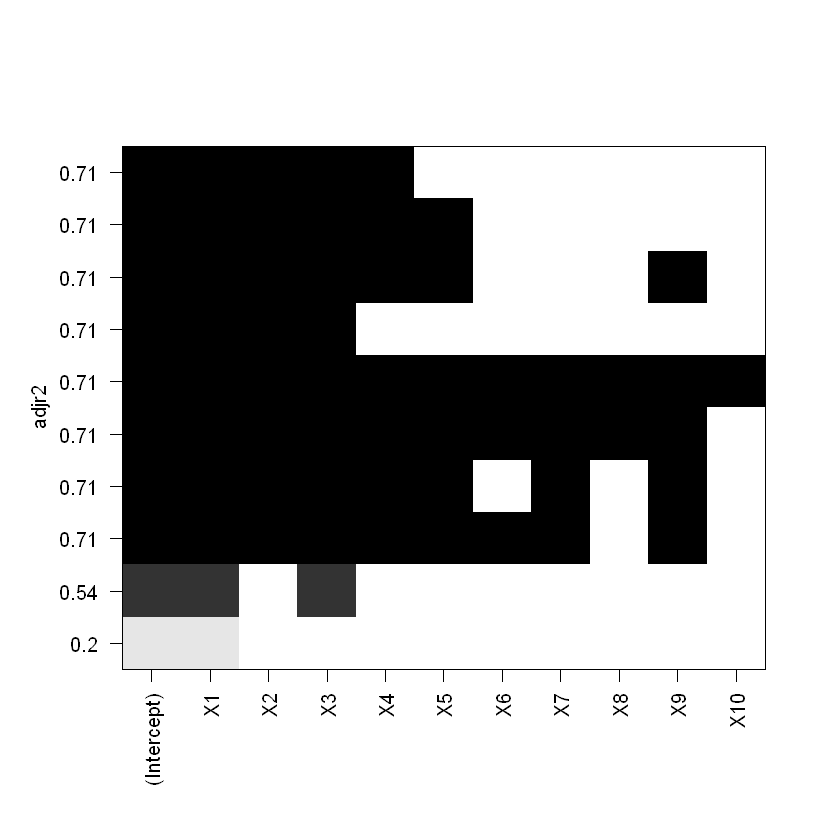

In [752]:
plot(forward.fit, scale = "adjr2")
coef(forward.fit,which.max(forward.summary$adjr2))

Based on Mallow's Cp, BIC and adjusted $R^2$ criterion, the best model includes $x_1, x_4$ and $x_8$ <br>
Both intercept and $x_1$ coefficient are close to the selected values, however both $x_2$ and $x_3$
have been excluded in favor of $x_4$. $x_8$ coefficient is negligible. 

## Backward Selection 
***

In [753]:
backward.fit <- regsubsets(y~., data = dataset,nvmax = 10, method = "backward")
backward.summary <- summary(backward.fit)

(Intercept)          X1          X3          X4          X6          X8 
 2.93240937 -2.14019838  0.50647572 -0.57043541  0.17385303 -0.01463005

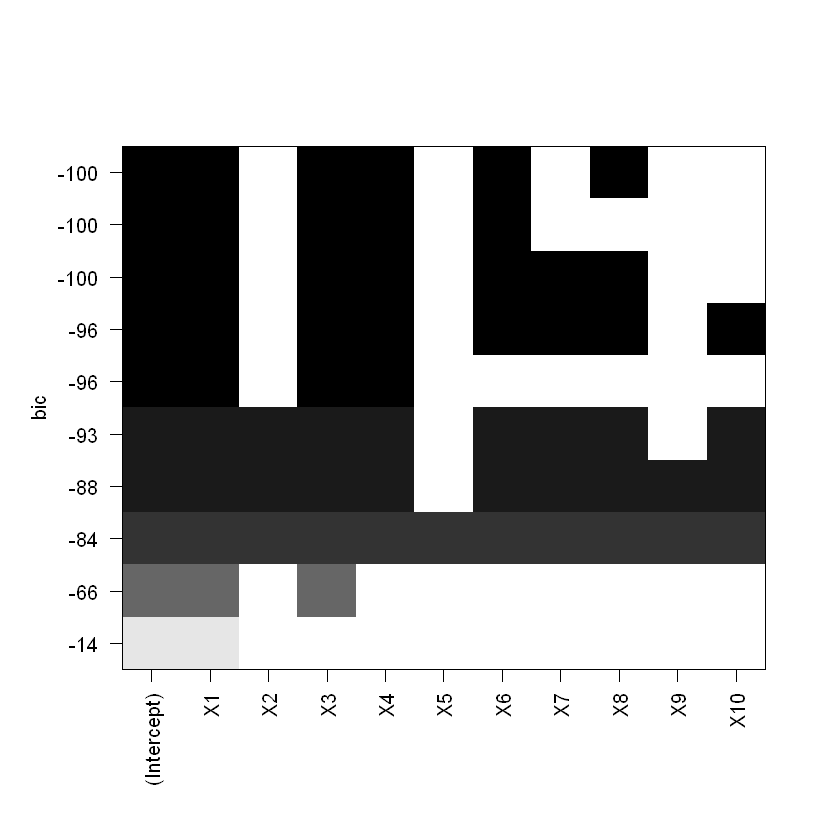

In [754]:
plot(backward.fit, scale = "bic")
coef(backward.fit,which.min(backward.summary$bic))

(Intercept)          X1          X3          X4          X6          X8 
 2.93240937 -2.14019838  0.50647572 -0.57043541  0.17385303 -0.01463005

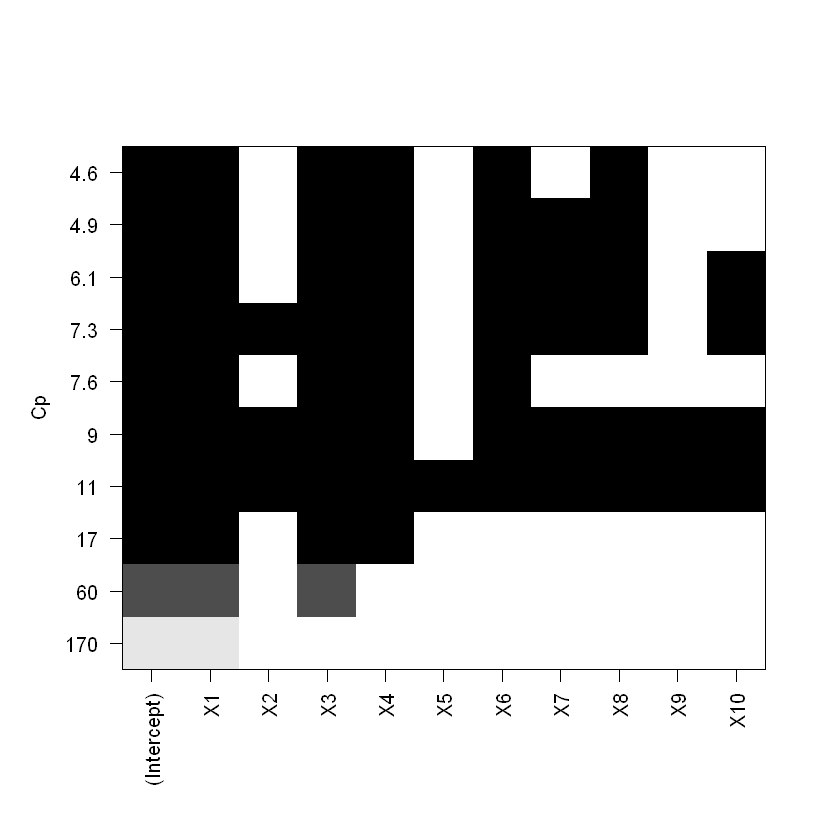

In [755]:
plot(backward.fit, scale = "Cp")
coef(backward.fit,which.min(backward.summary$cp))

(Intercept)           X1           X3           X4           X6           X7 
 2.943573973 -1.955180625  0.357059564 -0.626053132  0.209373458  0.005530541 
          X8 
-0.019797138

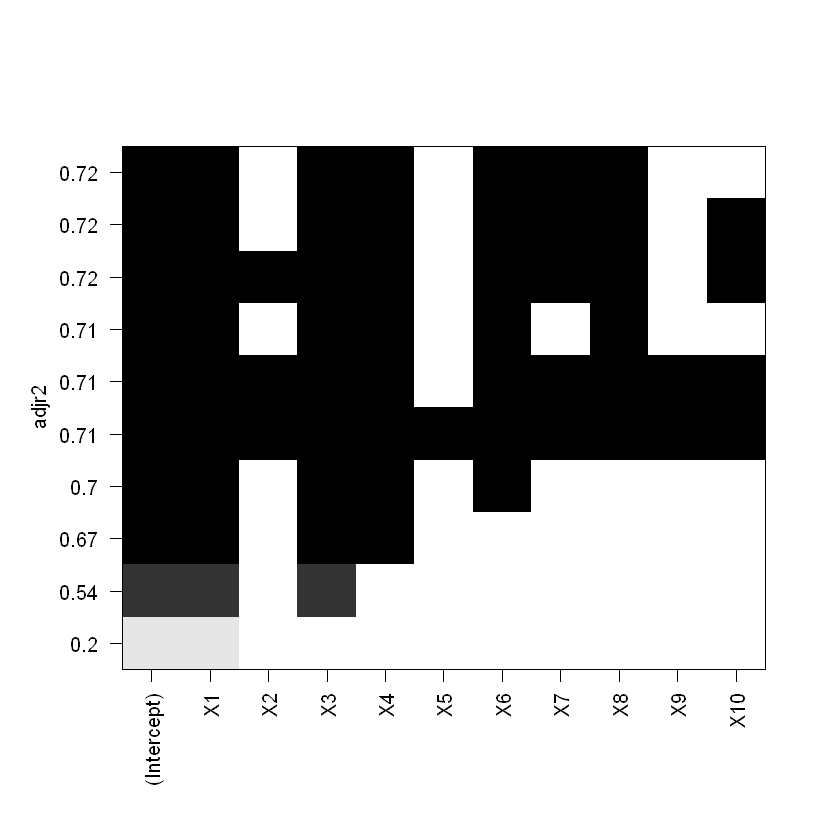

In [756]:
plot(backward.fit, scale = "adjr2")
coef(backward.fit,which.max(backward.summary$adjr2))

Based on Mallow's Cp, BIC and adjusted $R^2$ criterion, the best model includes $x_1, x_8, x_9$ and $x_{10}$ <br>
Both intercept and $x_1$ coefficient are close to the selected values, however the model selects high order polynomials over low order polynomials.

**E.** Now fit a lasso model to the simulated data, again using $X,X_2,
..., X_{10}$ as predictors. Use cross-validation to select the optimal
value of λ. Create plots of the cross-validation error as a function
of λ. Report the resulting coefficient estimates, and discuss the
results obtained.

## Lasso Method
***

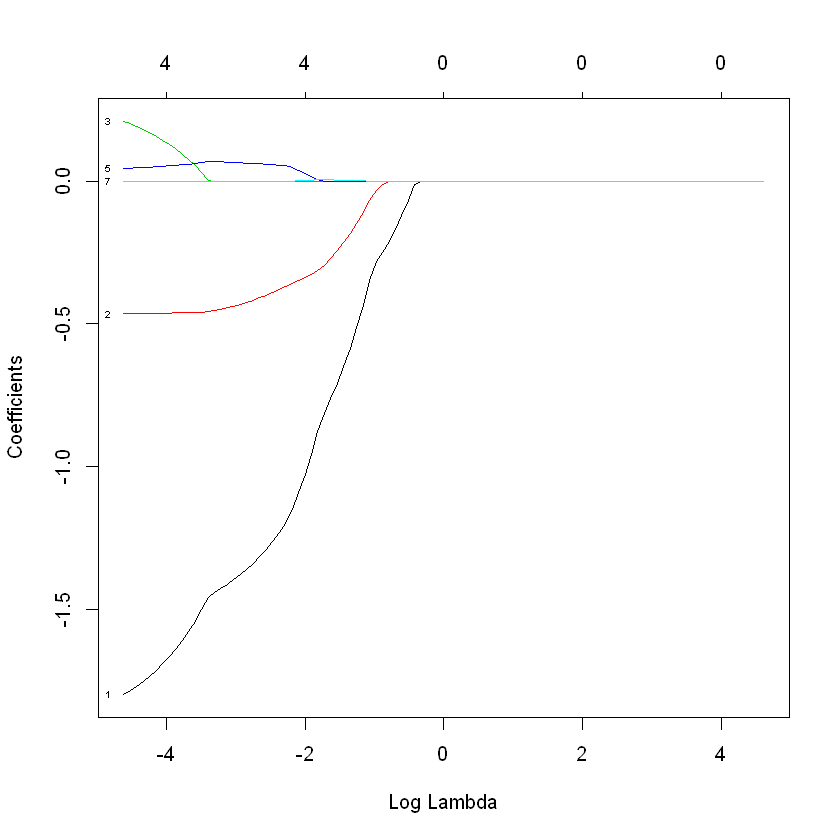

In [757]:
library(glmnet)
x.matrix <- model.matrix(y~.-1,data = dataset) 
param <- seq(2,-2,length = 100)
lambdas <- 10^param
fit.lasso <- glmnet(x.matrix,y,alpha = 1,lambda = lambdas)
plot(fit.lasso,xvar = "lambda",label = TRUE)

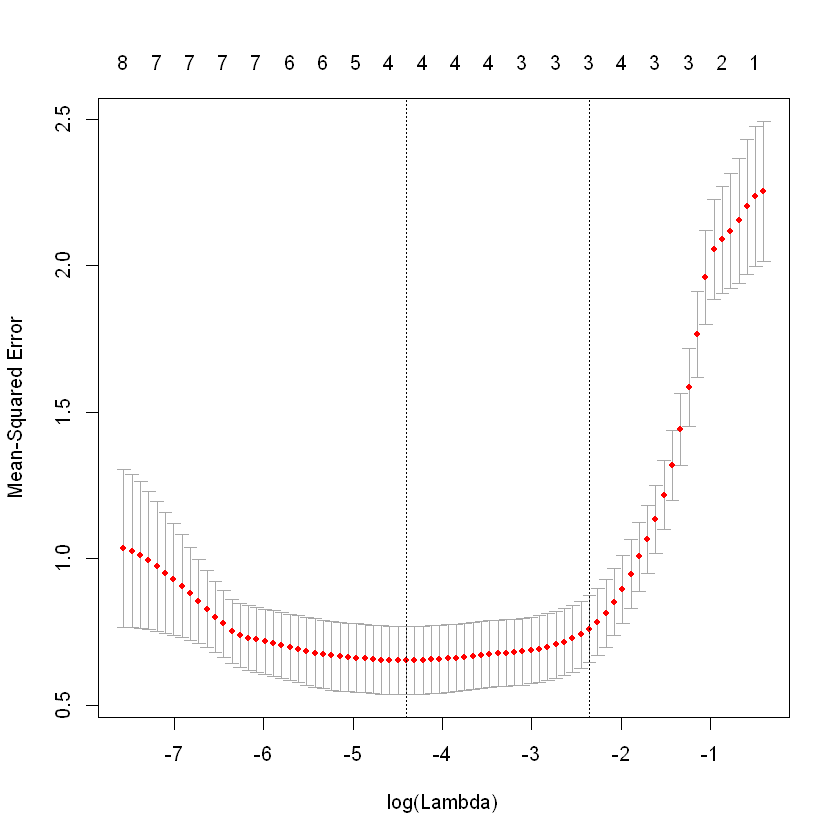

In [758]:
cv.lasso <- cv.glmnet(x.matrix,y,alpha = 1)
plot(cv.lasso)

In [759]:
coef(cv.lasso) #Select best model automatically

11 x 1 sparse Matrix of class "dgCMatrix"
                      1
(Intercept)  2.89466989
X1          -1.22647560
X2          -0.37710322
X3           .         
X4           .         
X5           0.05586811
X6           .         
X7           .         
X8           .         
X9           .         
X10          .         

**F.** Now generate a response vector Y according to the model
$$ Y = β_0 + β_7X_7 + \epsilon$$ <br>
and perform best subset selection and the lasso. Discuss the
results obtained.

(Intercept)          X3          X7 
  2.9945045  -0.1097157  -1.9963867

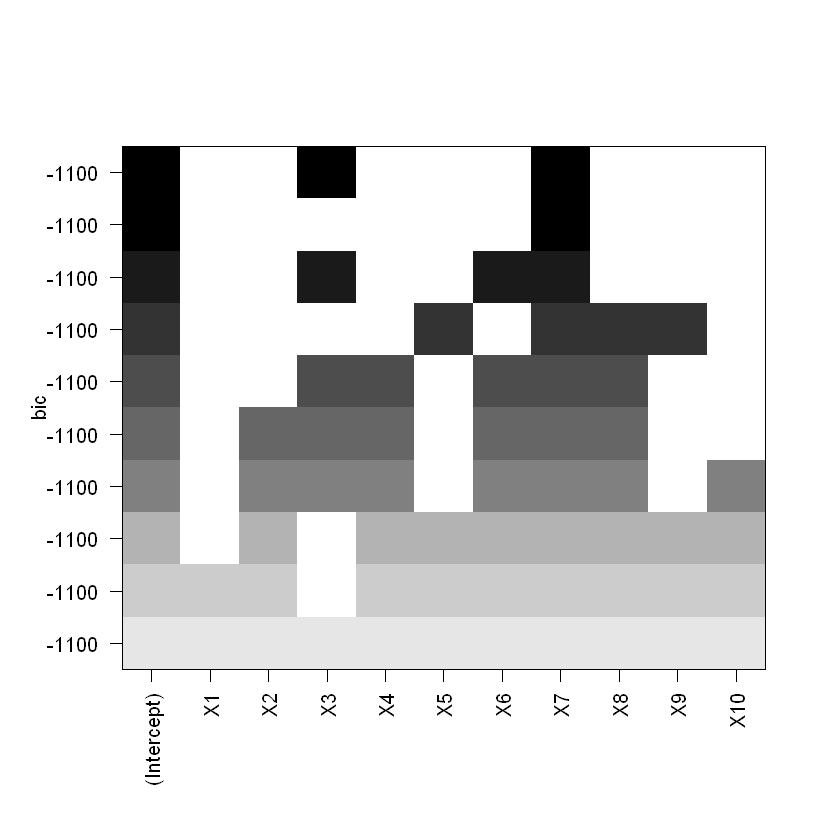

In [760]:
y <- B0 + B1*x^7+ep
dataset.model2 <- data.frame(y,poly(x,10,raw = TRUE))
regfit.model2 <- regsubsets(y~., data = dataset.model2,nvmax = 10)
model2.best.summary <- summary(regfit.model2)
plot(regfit.model2, scale = "bic")
coef(regfit.model2,which.min(model2.best.summary$bic))

(Intercept)          X3          X7 
  2.9945045  -0.1097157  -1.9963867

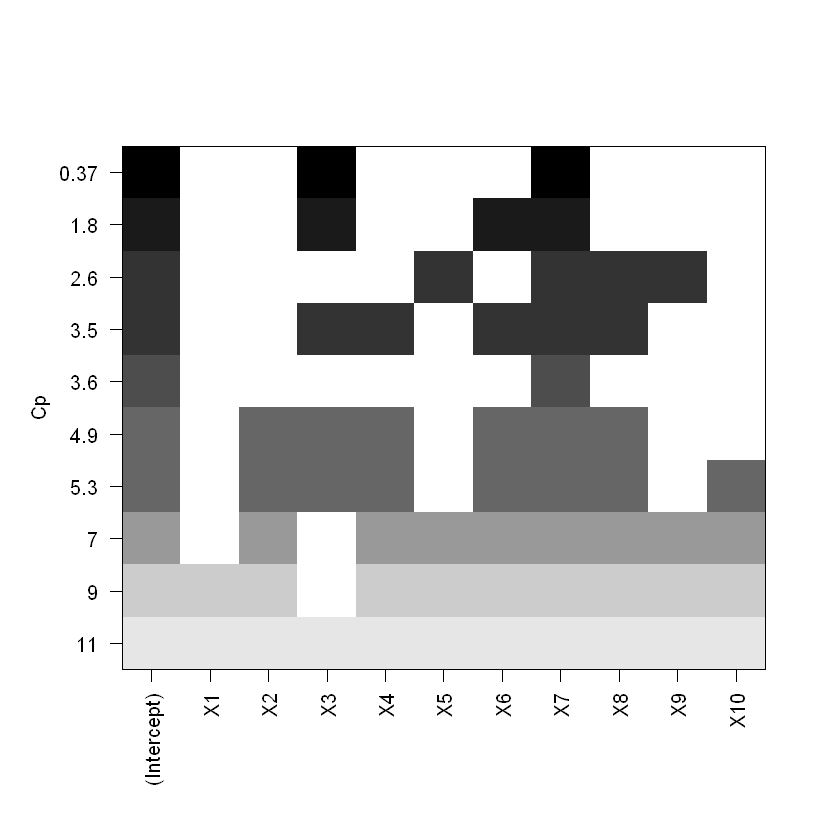

In [761]:
plot(regfit.model2, scale = "Cp")
coef(regfit.model2,which.min(model2.best.summary$cp))

(Intercept)           X2           X3           X4           X6           X7 
 2.888559433  1.282416176 -0.106621196 -1.878501942  0.832182158 -1.995311739 
          X8          X10 
-0.139593541  0.007822028

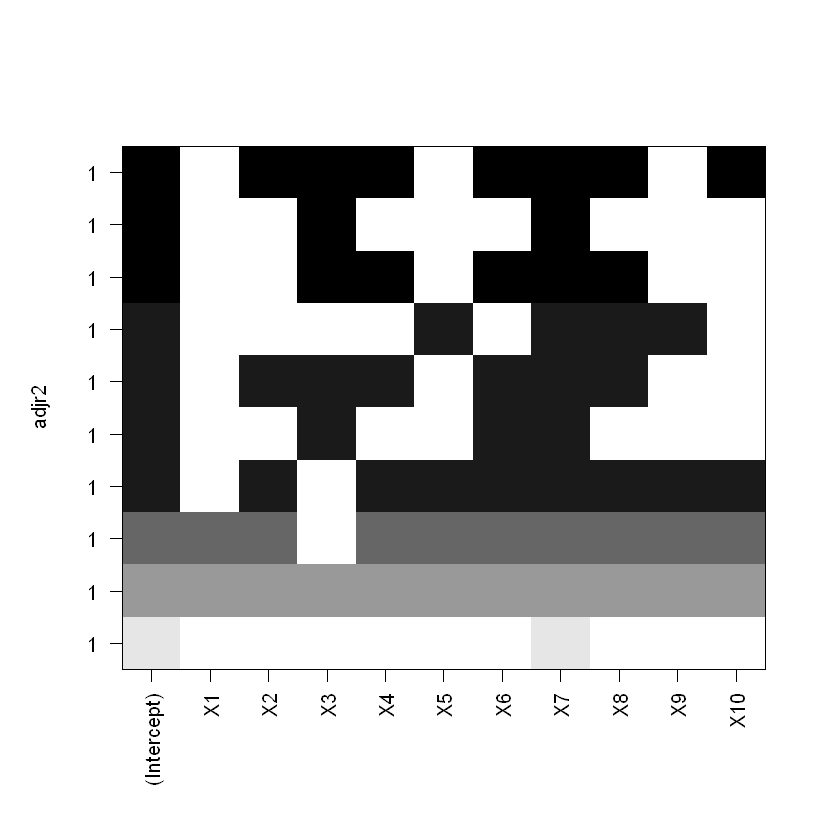

In [763]:
plot(regfit.model2, scale = "adjr2")
coef(regfit.model2,which.max(model2.best.summary$adjr2))

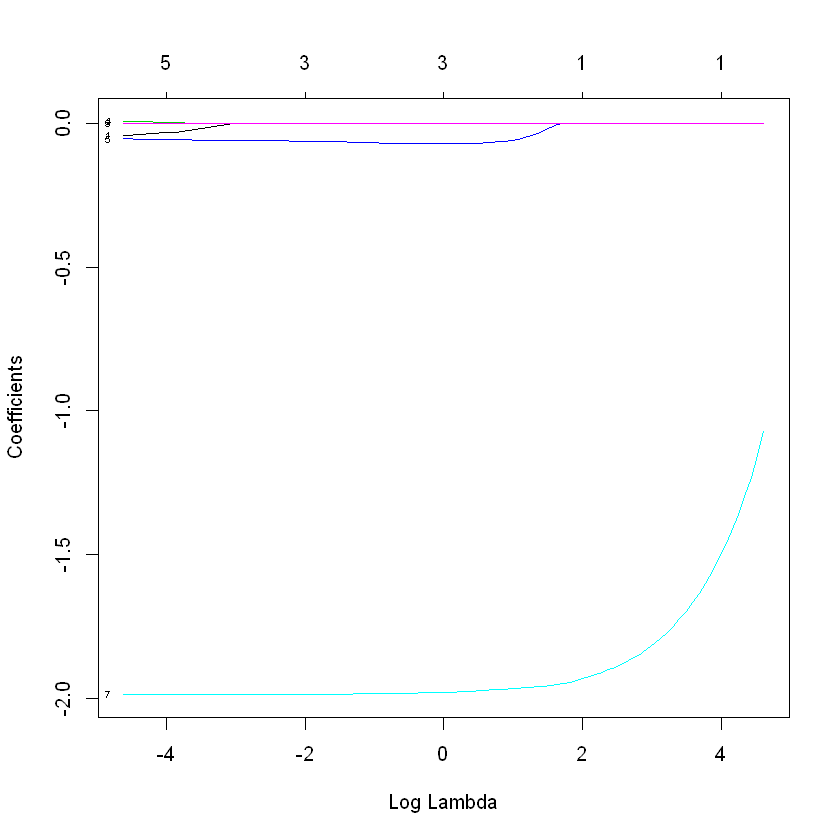

In [764]:
x.matrix <- model.matrix(y~.-1,data = dataset) 
param <- seq(2,-2,length = 100)
lambdas <- 10^param
fit.lasso <- glmnet(x.matrix,y,alpha = 1,lambda = lambdas)
plot(fit.lasso,xvar = "lambda",label = TRUE)

11 x 1 sparse Matrix of class "dgCMatrix"
                    1
(Intercept)  2.224447
X1           .       
X2           .       
X3           .       
X4           .       
X5           .       
X6           .       
X7          -1.922649
X8           .       
X9           .       
X10          .       

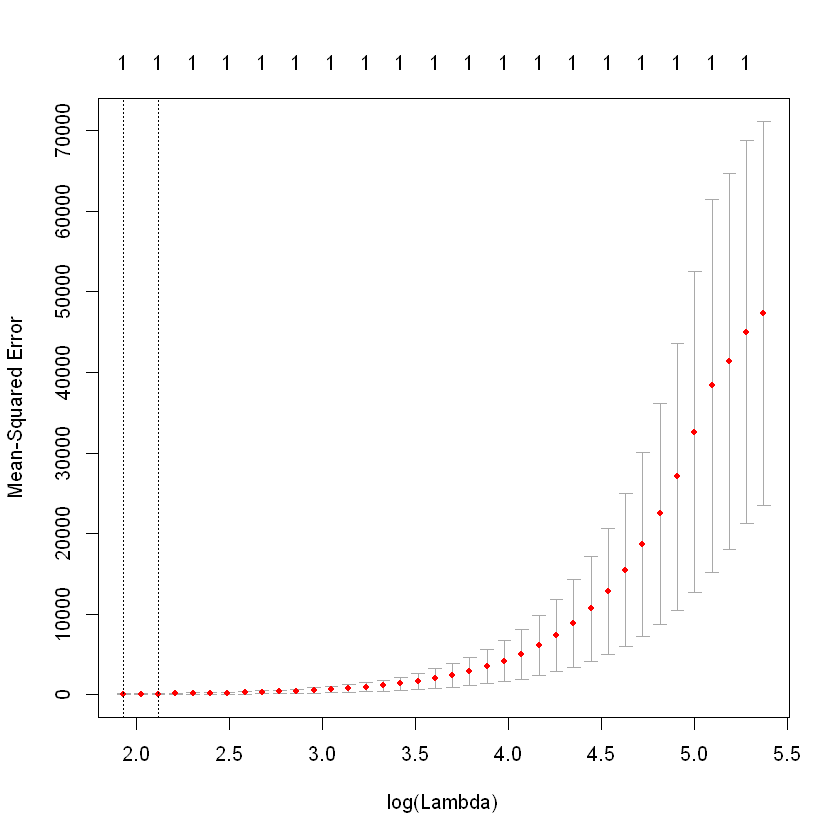

In [766]:
cv.lasso <- cv.glmnet(x.matrix,y,alpha = 1)
plot(cv.lasso)
coef(cv.lasso) #Select best model automatically